In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [2]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
sb_samples = pd.read_csv(path+"/training_set_VU_DM.csv", nrows=1000000)
sb_samples.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [ ]:
sb_samples.columns

In [ ]:
print(sb_samples['booking_bool'].value_counts())
#clicks 
print(sb_samples['click_bool'].value_counts())

In [ ]:
# Separate majority and minority classes
df_majority = sb_samples[sb_samples.booking_bool==0]
df_minority = sb_samples[sb_samples.booking_bool==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=138390,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.booking_bool.value_counts()

In [21]:
#how many searches without a booking?
test = sb_samples.groupby("srch_id").booking_bool.sum()
print(test.shape)
print(test.value_counts())

(40173,)
1    27738
0    12435
Name: booking_bool, dtype: int64


In [22]:
#how many searches with how many a clicks?
test = sb_samples.groupby("srch_id").click_bool.sum()
print(test.shape)
print(test.value_counts())


(40173,)
1     37548
2      1774
3       437
4       189
5        87
6        60
7        32
8        10
10        7
9         6
11        6
12        3
13        2
14        2
15        2
16        2
17        2
24        1
19        1
20        1
25        1
Name: click_bool, dtype: int64


In [ ]:
df_book = sb_samples.loc[sb_samples['booking_bool']==1]
df_click =sb_samples.loc[sb_samples["click_bool"]==1]

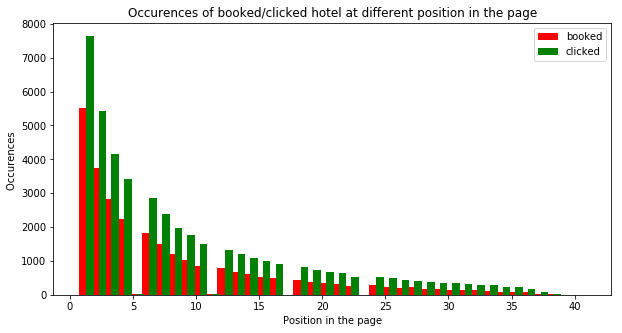

In [11]:
#plot of positions in the page against count of booked hotels in that position
df_book=df_book[["srch_id", "position"]]
df_click=df_click[["srch_id", "position"]]
position_count= df_book.groupby("position").count()
position_count_c= df_click.groupby("position").count()
xaxes=[i for i in range(1,41)]
fig, ax = plt.subplots(figsize=(10,5))
width = 0.6
ax.bar(xaxes,position_count.iloc[:,0], width, color="r", label="booked")
xaxes=[i+width for i in xaxes]
ax.bar(xaxes,position_count_c.iloc[:,0], width, color="g",label="clicked")
plt.title("Occurences of booked/clicked hotel at different position in the page")
plt.xlabel("Position in the page")
plt.ylabel("Occurences ")
plt.legend()


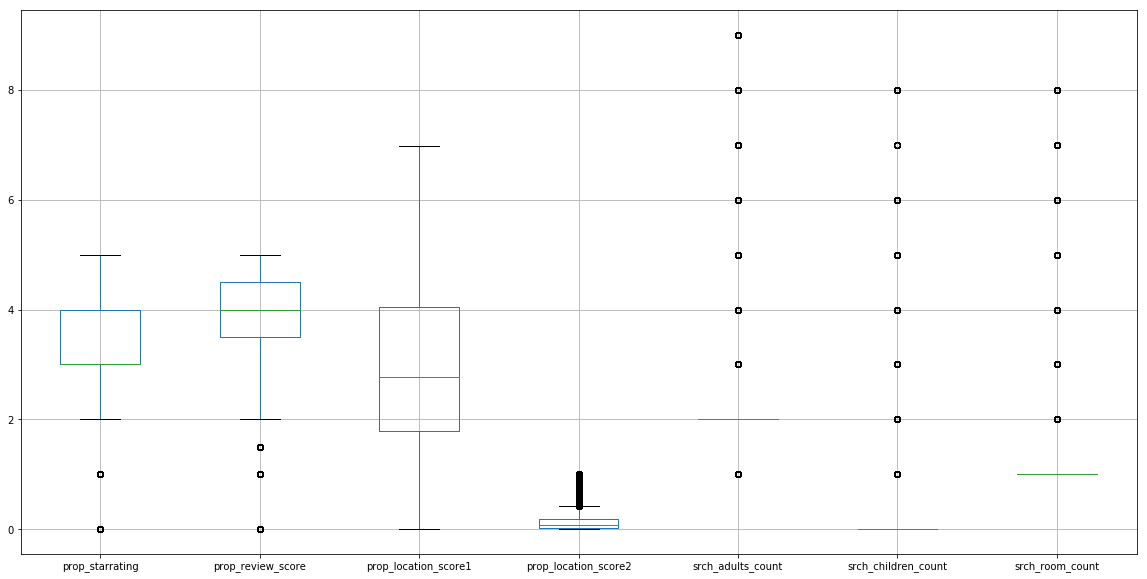

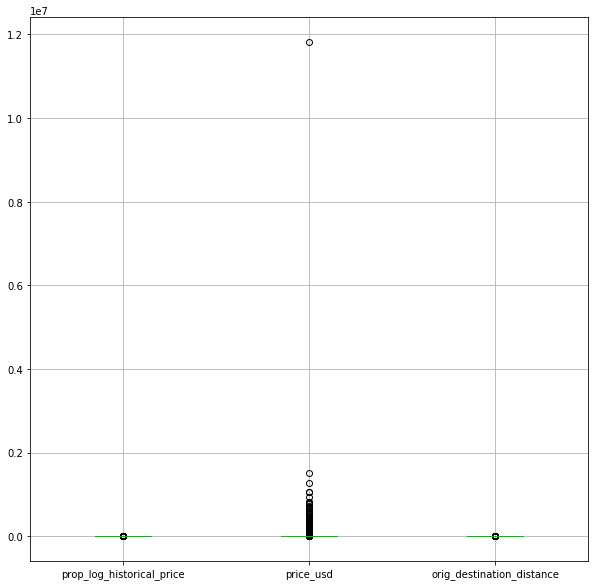

In [16]:
plt.figure(figsize=(20,10))
sb_samples.boxplot(column = ['prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','srch_adults_count','srch_children_count','srch_room_count'])
plt.show()
plt.figure(figsize=(10,10))
sb_samples.boxplot(column = ['prop_log_historical_price','price_usd','orig_destination_distance'])
plt.show()


In [32]:
df=sb_samples
df1=df.groupby('srch_id')["booking_bool"].apply(lambda x: (x==1).sum()).reset_index(name='count')
df2=df1.groupby("count").count()
df2

,srch_id
count,
0,12435
1,27738


In [36]:
df_count=df1.groupby("count")
df_booked=df_count.get_group(1)
df_not_booked=df_count.get_group(0)
print(df_booked)
print(df_not_booked)

       srch_id  count
0            1      1
2            6      1
3            8      1
7           21      1
8           25      1
9           28      1
10          29      1
11          30      1
13          36      1
14          39      1
16          42      1
18          44      1
19          45      1
20          46      1
21          47      1
22          49      1
23          52      1
24          53      1
26          57      1
27          60      1
30          64      1
32          66      1
33          67      1
35          72      1
36          73      1
37          74      1
38          75      1
39          78      1
40          79      1
41          80      1
...        ...    ...
40126    66719      1
40131    66726      1
40132    66727      1
40135    66731      1
40136    66732      1
40137    66733      1
40138    66734      1
40140    66737      1
40141    66739      1
40142    66743      1
40143    66745      1
40144    66747      1
40145    66748      1
40146    6